# Detecting biting

In [1]:
%load_ext autoreload
%autoreload 2
% matplotlib inline
import os, sys
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
sys.path += [os.path.abspath('.'), os.path.abspath('..')]
import bci.data_utils as tl_data

In [2]:
SAMPLE_FILE = os.path.join(tl_data.update_path('data_samples'), 'biting', '2.bin')
eeg = tl_data.load_data(SAMPLE_FILE, bands=[0.5, 30])
print (eeg.shape)

(5028, 8)


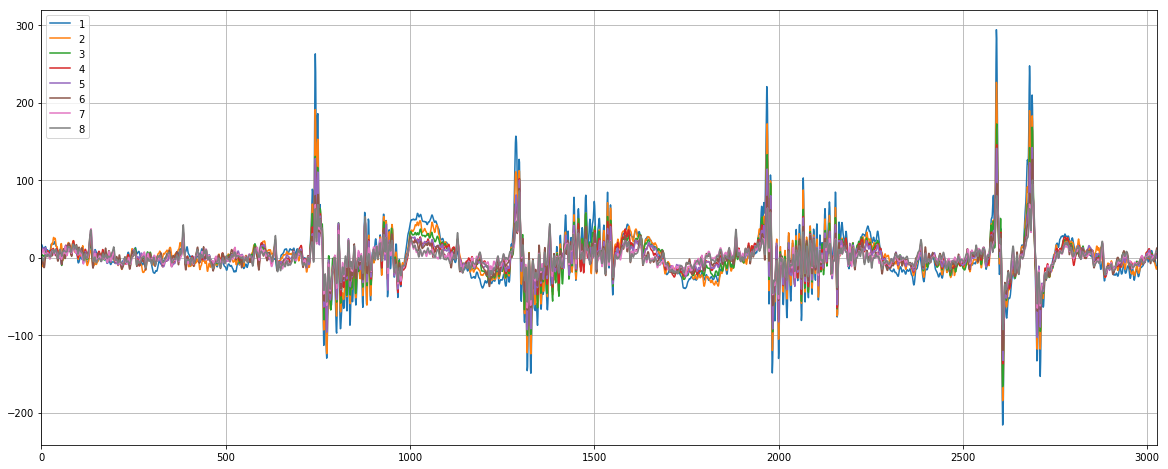

In [3]:
plt.figure(figsize=(20, 8))
for i in range(eeg.shape[1]):
    plt.plot(eeg[2000:, i], label=str(i + 1))
_= plt.grid(), plt.legend(loc=2), plt.xlim([0, len(eeg) - 2000])

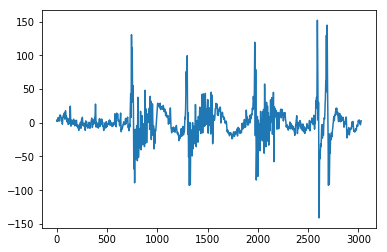

In [33]:
plt.plot(np.mean(eeg[2000:], axis=1))
plt.grid()

start - 0000 -> 1222.385376 - 266.184143
start - 0500 -> 1139.725342 - 399.567993
start - 0700 -> 8221.530273 - 4533.624512
start - 0900 -> 1844.029419 - 2808.806641
start - 1000 -> 4005.474365 - 197.384048
start - 1500 -> 2787.789307 - 3134.112061
start - 2000 -> 2928.262207 - 5400.341309
start - 2600 -> 7474.079102 - 3874.591797
start - 2700 -> 5031.799805 - 3540.707031


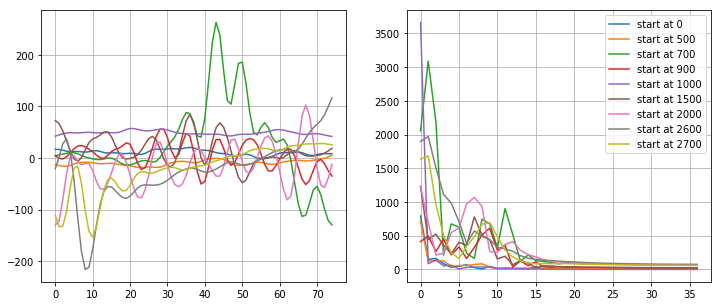

In [23]:
eeg_vision = eeg[2000:, 0]
samples = [0, 500, 700, 900, 1000, 1500, 2000, 2600, 2700]
offset = 75
eeg_vis_blocks = [eeg_vision[i:i + offset] for i in samples]
fig, axarr = plt.subplots(ncols=2, figsize=(12, 5))
for i, eb in enumerate(eeg_vis_blocks):
    axarr[0].plot(eb)
    yf = fftpack.fft(eb)
    axarr[1].plot(abs(yf[:int(offset/2)]), label='start at %i' % samples[i])
    print ('start - %04i -> %f - %f' % (samples[i], np.sum(np.abs(yf[:5])), np.sum(np.abs(yf[5:15]))))
for i in range(2):
    axarr[i].grid()
_= axarr[1].legend(loc=1)

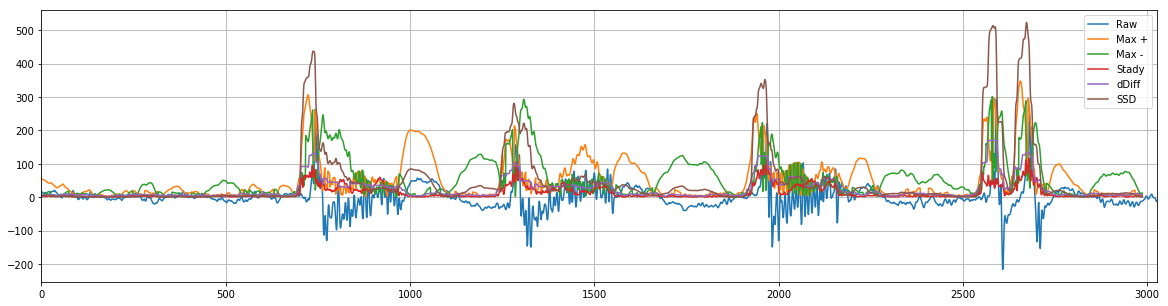

In [53]:
frame = 40
fft_max1, fft_max2 = [], []
fft_stb = []
diffs, ssds = [], []
for i in range(frame, len(eeg_vision)):
    sig = eeg_vision[i-frame:i]
    fft_max1.append(np.abs(np.max(fftpack.fft(sig)[:5])))
    fft_max2.append(np.abs(np.min(fftpack.fft(sig)[:5])))
    fft_stb.append(np.max(np.abs(fftpack.fft(sig)[5:10])))
    diffs.append(max(sig) - min(sig))
    ssds.append(np.mean(sig ** 2))
    
plt.figure(figsize=(20, 5))
plt.plot(eeg_vision, label='Raw')
plt.plot(np.array(fft_max1) / 10., label='Max +')
plt.plot(np.array(fft_max2) / 10., label='Max -')
plt.plot(np.array(fft_stb) / 10., label='Stady')
plt.plot(np.array(diffs) / 3., label='dDiff')
plt.plot(np.array(ssds) / 30., label='SSD')
_= plt.grid(), plt.legend(), plt.xlim([0, len(eeg) - 2000])